In [1]:
import os
import json
import csv
import seaborn as sns; sns.set()

In [2]:
def decode_features_safeguarded(filename):
    features_str = filename.split(".")[0][-4:]
    if not features_str.isdigit():
        return {
            "left_eye": 0,
            "right_eye": 0,
            "nose": 0,
            "mouth": 0
        }
    return {
        "left_eye": int(features_str[0]),
        "right_eye": int(features_str[1]),
        "nose": int(features_str[2]),
        "mouth": int(features_str[3])
    }

In [3]:
def extract_image_info_with_features(directory, label):
    image_infos = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            info = {}
            info["image_id"] = len(image_infos) + 1
            info["file_path"] = os.path.join("data", "real_and_fake_face", f"training_{label}", filename)
            info["pixel_size"] = "600x600"
            info["label"] = label
            info["difficulty"] = filename.split("_")[0]
            feature_values = decode_features_safeguarded(filename)
            info.update(feature_values)
            image_infos.append(info)
    return image_infos


In [4]:
def save_to_json(data, filename):
    with open(filename, 'w') as f:
        json.dump(data, f)

def save_to_csv(data, filename):
    with open(filename, 'w', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=data[0].keys())
        writer.writeheader()
        for row in data:
            writer.writerow(row)

In [5]:
# Extract data from directories
real_data = extract_image_info_with_features("data\\real_and_fake_face\\training_real", "real")
fake_data = extract_image_info_with_features("data\\real_and_fake_face\\training_fake", "fake")

# Combine the data
combined_data = real_data + fake_data

# Save to JSON and CSV
save_to_json(combined_data, "combined_data.json")
save_to_csv(combined_data, "combined_data.csv")



In [6]:
def print_decoded_samples(directory, label, num_samples=5):
    """
    Prints a few sample filenames along with their decoded feature values.
    
    Args:
    - directory (str): The directory containing the images.
    - label (str): The label of the images ('real' or 'fake').
    - num_samples (int): Number of samples to print.
    
    Returns:
    - None
    """
    sample_infos = extract_image_info_with_features(directory, label)[:num_samples]
    for info in sample_infos:
        print(f"Filename: {info['file_path'].split('/')[-1]}")
        print(f"  left_eye: {info['left_eye']}")
        print(f"  right_eye: {info['right_eye']}")
        print(f"  nose: {info['nose']}")
        print(f"  mouth: {info['mouth']}")
        print("-----")

# Mock demonstration using our mock filenames
# In the actual implementation on your machine, you'll replace 'sample_directory' with the paths to your 'training_real' or 'training_fake' directories.
sample_directory = "data\\real_and_fake_face\\training_fake"  # Using current directory as a sample for this environment.
print_decoded_samples(sample_directory, "real")
print_decoded_samples(sample_directory, "fake")


Filename: data\real_and_fake_face\training_real\easy_100_1111.jpg
  left_eye: 1
  right_eye: 1
  nose: 1
  mouth: 1
-----
Filename: data\real_and_fake_face\training_real\easy_101_0010.jpg
  left_eye: 0
  right_eye: 0
  nose: 1
  mouth: 0
-----
Filename: data\real_and_fake_face\training_real\easy_102_0101.jpg
  left_eye: 0
  right_eye: 1
  nose: 0
  mouth: 1
-----
Filename: data\real_and_fake_face\training_real\easy_103_1111.jpg
  left_eye: 1
  right_eye: 1
  nose: 1
  mouth: 1
-----
Filename: data\real_and_fake_face\training_real\easy_104_1000.jpg
  left_eye: 1
  right_eye: 0
  nose: 0
  mouth: 0
-----
Filename: data\real_and_fake_face\training_fake\easy_100_1111.jpg
  left_eye: 1
  right_eye: 1
  nose: 1
  mouth: 1
-----
Filename: data\real_and_fake_face\training_fake\easy_101_0010.jpg
  left_eye: 0
  right_eye: 0
  nose: 1
  mouth: 0
-----
Filename: data\real_and_fake_face\training_fake\easy_102_0101.jpg
  left_eye: 0
  right_eye: 1
  nose: 0
  mouth: 1
-----
Filename: data\real_and_

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("combined_data.csv")
df

,image_id,file_path,pixel_size,label,difficulty,left_eye,right_eye,nose,mouth
0,1,data\real_and_fake_face\training_real\real_000...,600x600,real,real,0,0,0,1
1,2,data\real_and_fake_face\training_real\real_000...,600x600,real,real,0,0,0,2
2,3,data\real_and_fake_face\training_real\real_000...,600x600,real,real,0,0,0,3
3,4,data\real_and_fake_face\training_real\real_000...,600x600,real,real,0,0,0,4
4,5,data\real_and_fake_face\training_real\real_000...,600x600,real,real,0,0,0,5
...,...,...,...,...,...,...,...,...,...
2036,956,data\real_and_fake_face\training_fake\mid_96_1...,600x600,fake,mid,1,1,1,1
2037,957,data\real_and_fake_face\training_fake\mid_97_1...,600x600,fake,mid,1,1,1,1
2038,958,data\real_and_fake_face\training_fake\mid_98_1...,600x600,fake,mid,1,1,1,1
2039,959,data\real_and_fake_face\training_fake\mid_99_1...,600x600,fake,mid,1,1,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_id    2041 non-null   int64 
 1   file_path   2041 non-null   object
 2   pixel_size  2041 non-null   object
 3   label       2041 non-null   object
 4   difficulty  2041 non-null   object
 5   left_eye    2041 non-null   int64 
 6   right_eye   2041 non-null   int64 
 7   nose        2041 non-null   int64 
 8   mouth       2041 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 143.6+ KB


In [9]:
df.describe()

,image_id,left_eye,right_eye,nose,mouth
count,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000
mean,512.543361,0.371877,2.536502,2.666340,2.700637
std,297.750371,0.483424,2.804542,2.814857,2.847952
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,256.000000,0.000000,1.000000,1.000000,1.000000
50%,511.000000,0.000000,1.000000,1.000000,1.000000
75%,766.000000,1.000000,4.000000,5.000000,5.000000
max,1081.000000,1.000000,9.000000,9.000000,9.000000


In [10]:
df['pixel_size'].unique()

array(['600x600'], dtype=object)

In [11]:
len(df['file_path'].unique())

2041

In [12]:
len(df[df['label'] == 'fake'])
len(df[df['difficulty'] == 'mid'])

480

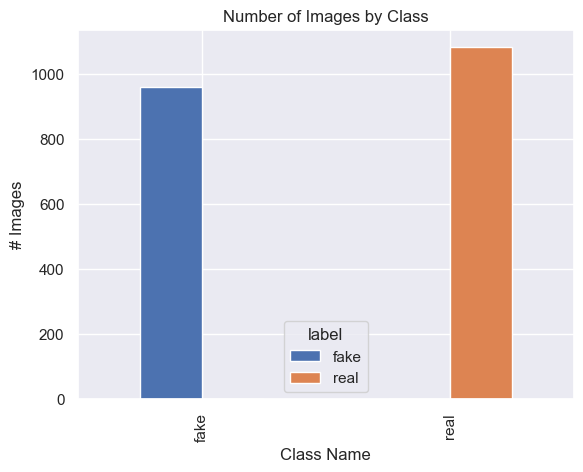

In [13]:
CrosstabResult = pd.crosstab(index = df['label'], columns = df['label']);
CrosstabResult.plot.bar()
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

In [14]:
df['label_dummy'] = pd.get_dummies(df['label'], drop_first=True)
df[['easy', 'hard', 'mid', 'real']] = pd.get_dummies(df['difficulty'])
df

,image_id,file_path,pixel_size,label,difficulty,left_eye,right_eye,nose,mouth,label_dummy,easy,hard,mid,real
0,1,data\real_and_fake_face\training_real\real_000...,600x600,real,real,0,0,0,1,1,0,0,0,1
1,2,data\real_and_fake_face\training_real\real_000...,600x600,real,real,0,0,0,2,1,0,0,0,1
2,3,data\real_and_fake_face\training_real\real_000...,600x600,real,real,0,0,0,3,1,0,0,0,1
3,4,data\real_and_fake_face\training_real\real_000...,600x600,real,real,0,0,0,4,1,0,0,0,1
4,5,data\real_and_fake_face\training_real\real_000...,600x600,real,real,0,0,0,5,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,956,data\real_and_fake_face\training_fake\mid_96_1...,600x600,fake,mid,1,1,1,1,0,0,0,1,0
2037,957,data\real_and_fake_face\training_fake\mid_97_1...,600x600,fake,mid,1,1,1,1,0,0,0,1,0
2038,958,data\real_and_fake_face\training_fake\mid_98_1...,600x600,fake,mid,1,1,1,1,0,0,0,1,0
2039,959,data\real_and_fake_face\training_fake\mid_99_1...,600x600,fake,mid,1,1,0,0,0,0,0,1,0


In [15]:
df['label_dummy'].value_counts()/df['label_dummy'].count()

1    0.529642
0    0.470358
Name: label_dummy, dtype: float64

In [16]:
df['label_dummy'].value_counts()

1    1081
0     960
Name: label_dummy, dtype: int64

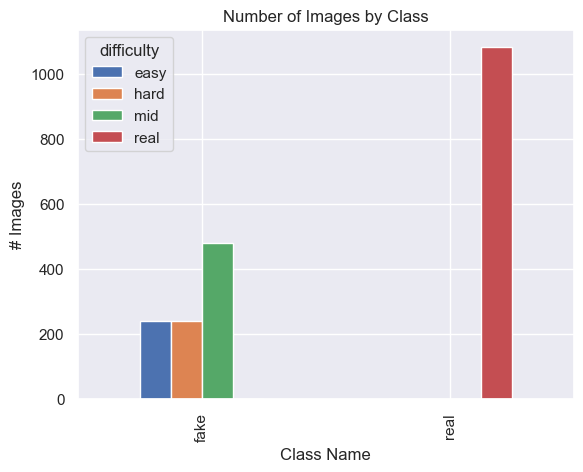

In [17]:
CrosstabResult = pd.crosstab(index = df['label'], columns = df['difficulty']);
CrosstabResult.plot.bar()
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

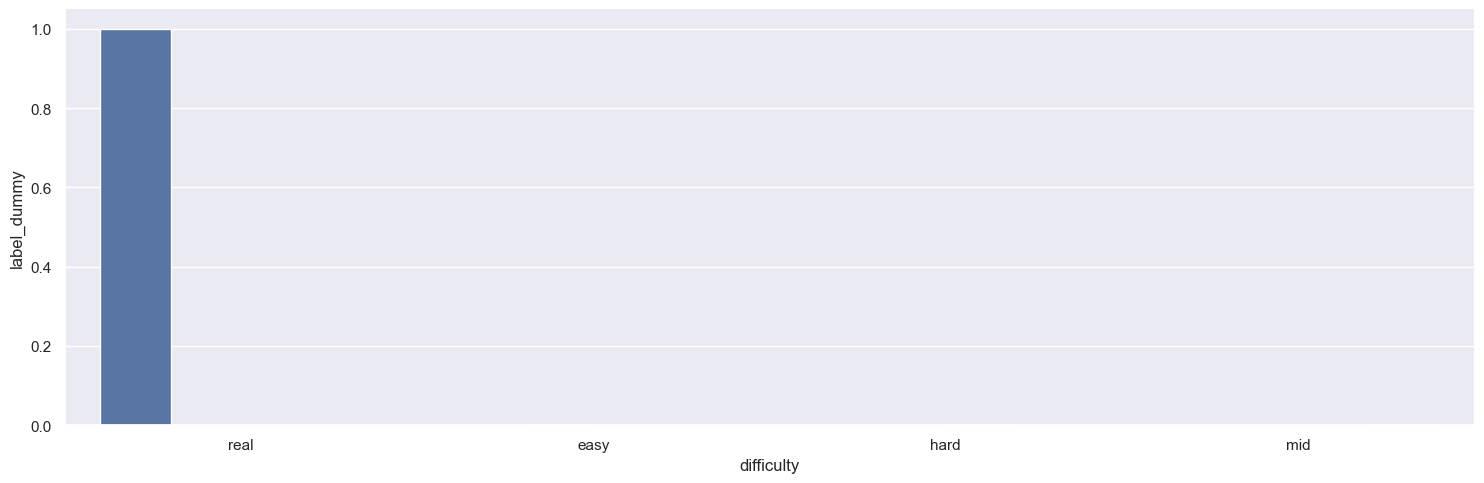

In [18]:
a1=sns.catplot(x="difficulty", y="label_dummy", hue="difficulty", kind="bar", data=df,aspect=3, height=5);
plt.savefig('label by difficulty')
plt.show()

In [19]:
real_diff = df[df['difficulty'] == 'real']
easy_diff = df[df['difficulty'] == 'easy']
mid_diff = df[df['difficulty'] == 'mid']
hard_diff = df[df['difficulty'] == 'hard']

In [20]:
sample_real = real_diff.sample(n=4)
sample_easy = easy_diff.sample(n=4)
sample_mid = mid_diff.sample(n=4)
sample_hard = hard_diff.sample(n=4)

In [21]:
#import libraries 

from PIL import Image
from matplotlib import pyplot as plt 
def show_img(image_df):
    # create figure 
    fig = plt.figure(figsize=(10, 7)) 

    # setting values to rows and column variables 
    rows = 2
    columns = 2
    
    Image1 = Image.open(str(image_df['file_path'].iloc[0])) 
    Image2 = Image.open(str(image_df['file_path'].iloc[1]))
    Image3 = Image.open(str(image_df['file_path'].iloc[2]))
    Image4 = Image.open(str(image_df['file_path'].iloc[3]))
    
    # Adds a subplot at the 1st position 
    fig.add_subplot(rows, columns, 1) 

    # showing image 
    plt.imshow(np.asarray(Image1)) 
    plt.axis('off') 
    plt.title("First") 

    # Adds a subplot at the 2nd position 
    fig.add_subplot(rows, columns, 2) 

    # showing image 
    plt.imshow(np.asarray(Image2)) 
    plt.axis('off') 
    plt.title("Second") 

    # Adds a subplot at the 3rd position 
    fig.add_subplot(rows, columns, 3) 

    # showing image 
    plt.imshow(np.asarray(Image3))
    plt.axis('off') 
    plt.title("Third") 

    # Adds a subplot at the 4th position 
    fig.add_subplot(rows, columns, 4) 

    # showing image 
    plt.imshow(np.asarray(Image4)) 
    plt.axis('off') 
    plt.title("Fourth") 

Real Images


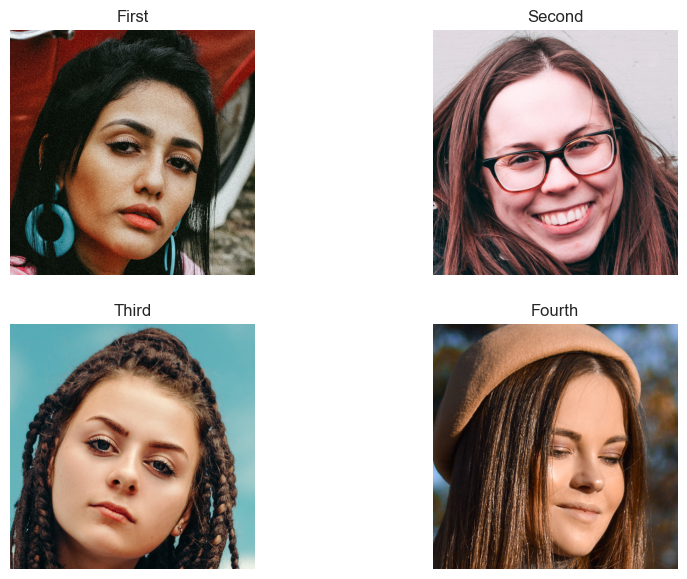

In [26]:
print('Real Images')
real = show_img(sample_real)
plt.savefig("real.jpg")

 "Easy" Manipulated Images 


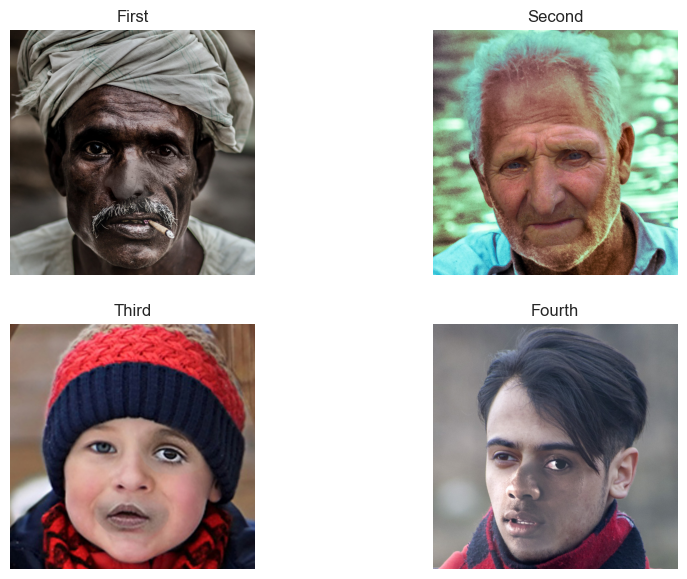

In [27]:
print(""" "Easy" Manipulated Images """)
easy = show_img(sample_easy)
plt.savefig("easy.jpg")

 "Mid" Manipulated Images 


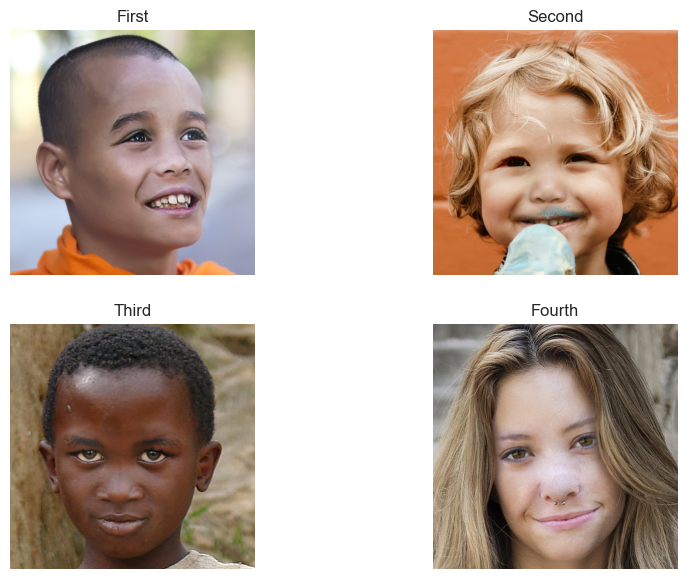

In [28]:
print(""" "Mid" Manipulated Images """)
mid = show_img(sample_mid)
plt.savefig("mid.jpg")

 "Hard" Manipulated Images 


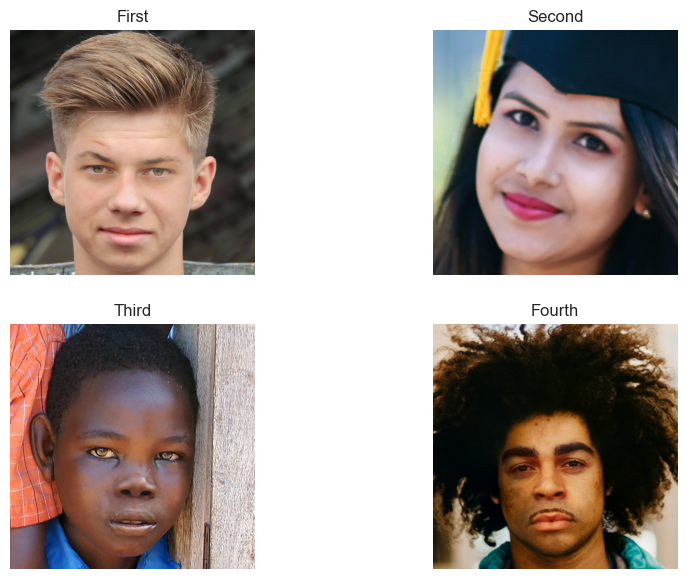

In [29]:
print(""" "Hard" Manipulated Images """)
hard = show_img(sample_hard)
plt.savefig("hard.jpg")